In [1]:
import gc
gc.collect()

38

In [2]:
import numpy as np
import pandas as pd
import os
import itertools
from itertools import chain
import random
import shutil
import tensorflow as tf
from tensorflow import keras
from keras import models
from tensorflow.keras import Model
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from matplotlib.image import imread
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import img_to_array,load_img
from keras.applications.inception_v3 import preprocess_input,InceptionV3
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.layers import GlobalAveragePooling2D,Dense,Flatten,Dropout
from keras.utils.vis_utils import plot_model
from sklearn.metrics import confusion_matrix
import pickle

About Dataset: Stanford Dog Dataset- 20,580 images in 120 breeds

In [3]:
fpath="C:\\Files\\Project Related\\DataSet\\images\\Images"
print(os.listdir(fpath))
dog_classes=os.listdir(fpath)

['n02085620-Chihuahua', 'n02085782-Japanese_spaniel', 'n02085936-Maltese_dog', 'n02086079-Pekinese', 'n02086240-Shih-Tzu', 'n02086646-Blenheim_spaniel', 'n02086910-papillon', 'n02087046-toy_terrier', 'n02087394-Rhodesian_ridgeback', 'n02088094-Afghan_hound', 'n02088238-basset', 'n02088364-beagle', 'n02088466-bloodhound', 'n02088632-bluetick', 'n02089078-black-and-tan_coonhound', 'n02089867-Walker_hound', 'n02089973-English_foxhound', 'n02090379-redbone', 'n02090622-borzoi', 'n02090721-Irish_wolfhound', 'n02091032-Italian_greyhound', 'n02091134-whippet', 'n02091244-Ibizan_hound', 'n02091467-Norwegian_elkhound', 'n02091635-otterhound', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02092339-Weimaraner', 'n02093256-Staffordshire_bullterrier', 'n02093428-American_Staffordshire_terrier', 'n02093647-Bedlington_terrier', 'n02093754-Border_terrier', 'n02093859-Kerry_blue_terrier', 'n02093991-Irish_terrier', 'n02094114-Norfolk_terrier', 'n02094258-Norwich_terrier', 'n02094433-Yorkshire_t

In [4]:
# getting labels in breeds variable by splitting the folder name at '-'
breeds=[breed.split('-',1)[1] for breed in dog_classes]
print(breeds)

['Chihuahua', 'Japanese_spaniel', 'Maltese_dog', 'Pekinese', 'Shih-Tzu', 'Blenheim_spaniel', 'papillon', 'toy_terrier', 'Rhodesian_ridgeback', 'Afghan_hound', 'basset', 'beagle', 'bloodhound', 'bluetick', 'black-and-tan_coonhound', 'Walker_hound', 'English_foxhound', 'redbone', 'borzoi', 'Irish_wolfhound', 'Italian_greyhound', 'whippet', 'Ibizan_hound', 'Norwegian_elkhound', 'otterhound', 'Saluki', 'Scottish_deerhound', 'Weimaraner', 'Staffordshire_bullterrier', 'American_Staffordshire_terrier', 'Bedlington_terrier', 'Border_terrier', 'Kerry_blue_terrier', 'Irish_terrier', 'Norfolk_terrier', 'Norwich_terrier', 'Yorkshire_terrier', 'wire-haired_fox_terrier', 'Lakeland_terrier', 'Sealyham_terrier', 'Airedale', 'cairn', 'Australian_terrier', 'Dandie_Dinmont', 'Boston_bull', 'miniature_schnauzer', 'giant_schnauzer', 'standard_schnauzer', 'Scotch_terrier', 'Tibetan_terrier', 'silky_terrier', 'soft-coated_wheaten_terrier', 'West_Highland_white_terrier', 'Lhasa', 'flat-coated_retriever', 'cur

In [5]:
#getting each images full paths and labels in x and y
x=[]
y=[]
fullpaths=['C:\\Files\\Project Related\\DataSet\\images\\Images\\{}'.format(dog_class) for dog_class in dog_classes]

for counter, fullpath in enumerate(fullpaths):
    for imgname in os.listdir(fullpath):
        x.append([fullpath + '\\' + imgname])
        y.append(breeds[counter])
        
print(x[:10],"\n")
print(y[:10],"\n")

# unnest the list
x=list(chain.from_iterable(x))
print(x[:10],"\n")
len(x)

[['C:\\Files\\Project Related\\DataSet\\images\\Images\\n02085620-Chihuahua\\n02085620_10074.jpg'], ['C:\\Files\\Project Related\\DataSet\\images\\Images\\n02085620-Chihuahua\\n02085620_10131.jpg'], ['C:\\Files\\Project Related\\DataSet\\images\\Images\\n02085620-Chihuahua\\n02085620_10621.jpg'], ['C:\\Files\\Project Related\\DataSet\\images\\Images\\n02085620-Chihuahua\\n02085620_1073.jpg'], ['C:\\Files\\Project Related\\DataSet\\images\\Images\\n02085620-Chihuahua\\n02085620_10976.jpg'], ['C:\\Files\\Project Related\\DataSet\\images\\Images\\n02085620-Chihuahua\\n02085620_11140.jpg'], ['C:\\Files\\Project Related\\DataSet\\images\\Images\\n02085620-Chihuahua\\n02085620_11238.jpg'], ['C:\\Files\\Project Related\\DataSet\\images\\Images\\n02085620-Chihuahua\\n02085620_11258.jpg'], ['C:\\Files\\Project Related\\DataSet\\images\\Images\\n02085620-Chihuahua\\n02085620_11337.jpg'], ['C:\\Files\\Project Related\\DataSet\\images\\Images\\n02085620-Chihuahua\\n02085620_11477.jpg']] 

['Chihua

20580

Here we shuffle images and their labels so they are located at differnt spaces in the array

In [6]:
combined=list(zip(x,y))
print(combined[:10],"\n")
random.shuffle(combined)

print(combined[:10],"\n")
x[:],y[:] = zip(*combined)

[('C:\\Files\\Project Related\\DataSet\\images\\Images\\n02085620-Chihuahua\\n02085620_10074.jpg', 'Chihuahua'), ('C:\\Files\\Project Related\\DataSet\\images\\Images\\n02085620-Chihuahua\\n02085620_10131.jpg', 'Chihuahua'), ('C:\\Files\\Project Related\\DataSet\\images\\Images\\n02085620-Chihuahua\\n02085620_10621.jpg', 'Chihuahua'), ('C:\\Files\\Project Related\\DataSet\\images\\Images\\n02085620-Chihuahua\\n02085620_1073.jpg', 'Chihuahua'), ('C:\\Files\\Project Related\\DataSet\\images\\Images\\n02085620-Chihuahua\\n02085620_10976.jpg', 'Chihuahua'), ('C:\\Files\\Project Related\\DataSet\\images\\Images\\n02085620-Chihuahua\\n02085620_11140.jpg', 'Chihuahua'), ('C:\\Files\\Project Related\\DataSet\\images\\Images\\n02085620-Chihuahua\\n02085620_11238.jpg', 'Chihuahua'), ('C:\\Files\\Project Related\\DataSet\\images\\Images\\n02085620-Chihuahua\\n02085620_11258.jpg', 'Chihuahua'), ('C:\\Files\\Project Related\\DataSet\\images\\Images\\n02085620-Chihuahua\\n02085620_11337.jpg', 'Chihu

Displaying Random dog images

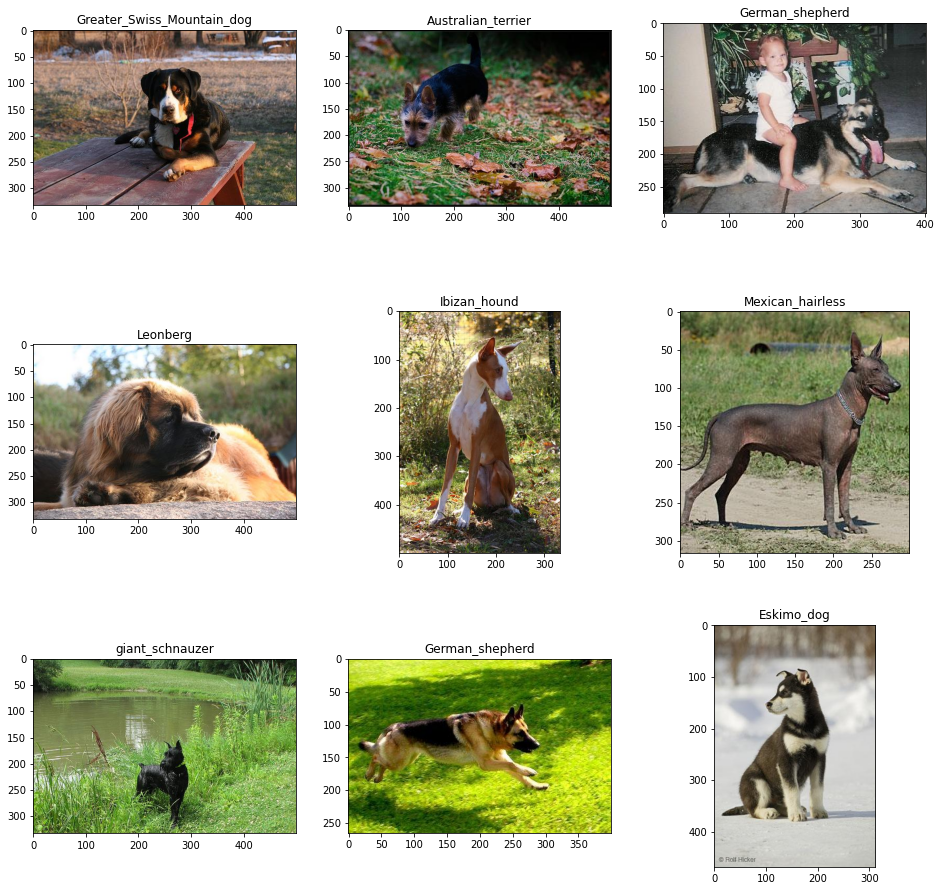

In [7]:
%matplotlib inline

plt.figure(figsize=(16,16))
for counter, i in enumerate(random.sample(range(0,len(x)) ,9)):
   plt.subplot(3,3,counter+1)
   plt.subplots_adjust(hspace=0.3)
   filename=x[i]
   image=imread(filename)
   plt.imshow(image)
   plt.title(y[i],fontsize=12)

plt.show()
    

Using one hot encoding, so that for each image there will be 120 columns, with all but one column with a value of 0. The only column with a value 1 will be image associated breed.

In [8]:
x=x[:5000]
y=y[:5000]

In [9]:
le=LabelEncoder()
le.fit(y)
y_ohe=to_categorical(le.transform(y),len(breeds))
print(y_ohe.shape)
y_ohe=np.array(y_ohe)

(5000, 120)


In [10]:
img_data=np.array([img_to_array(load_img(img,target_size=(299,299))) for img in x])
print(img_data.shape)

x_train,x_test,y_train,y_test=train_test_split(img_data,y_ohe,test_size=0.2,random_state=2)

x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.2,random_state=2)

print('Training Dataset Size',x_train.shape);
print('Validation Dataset Size',x_val.shape);
print('Test Dataset Size',x_test.shape);

del img_data
gc.collect()

(5000, 299, 299, 3)
Training Dataset Size (3200, 299, 299, 3)
Validation Dataset Size (800, 299, 299, 3)
Test Dataset Size (1000, 299, 299, 3)


25598

Performing Image Augmentation

In [11]:
batch_size=32
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   rotation_range=30,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True)

train_generator = train_datagen.flow(x_train,y_train,shuffle=False,batch_size=batch_size,seed=1)

val_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)

val_generator = val_datagen.flow(x_val,y_val,
                                shuffle=False,
                                batch_size=batch_size,seed=1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<function matplotlib.pyplot.show(close=None, block=None)>

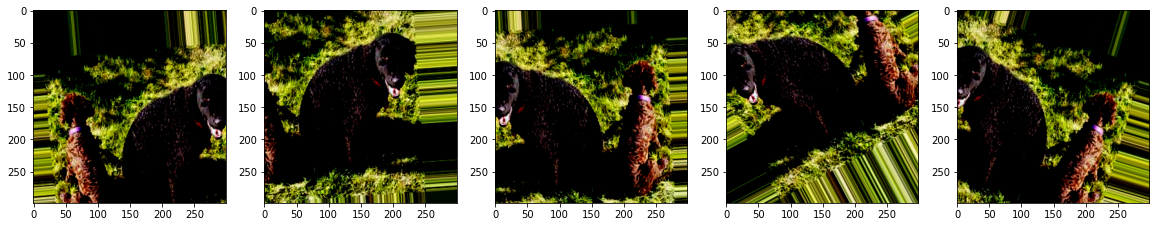

In [12]:
img_id=26
dog_generator=train_datagen.flow(x_train[img_id:img_id+1],y_train[img_id:img_id+1],shuffle=False,batch_size=batch_size,seed=1)
    
plt.figure(figsize=(20,20))
dogs=[next(dog_generator) for i in range(0,5)]
for counter,dog in enumerate(dogs):
    plt.subplot(1,5,counter+1)
    plt.imshow(dog[0][0])
    
plt.show

In [13]:
pre_trained_model=InceptionV3(weights='imagenet',include_top=False,input_shape=(299,299,3))

In [14]:
model=models.Sequential()
model.add(pre_trained_model)
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.3))
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(120,activation='softmax'))

print('Number of Trainable weights before freezing the base layer:',len(model.trainable_weights))
model.layers[0].trainable=False
print('Number of trainable weights after freezing the base layer:',len(model.trainable_weights))

Number of Trainable weights before freezing the base layer: 194
Number of trainable weights after freezing the base layer: 6


In [15]:
model.compile(Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 120)               61560     
                                                        

In [16]:
train_steps_per_epoch=x_train.shape[0]//batch_size
val_steps_per_epoch=x_val.shape[0]//batch_size
history=model.fit(train_generator,steps_per_epoch=train_steps_per_epoch,validation_data=val_generator,validation_steps=val_steps_per_epoch,epochs=30,verbose=1)

Epoch 1/30
100/100 [==============================] - 201s 2s/step - loss: 4.4521 - accuracy: 0.1453 - val_loss: 3.7619 - val_accuracy: 0.4512
Epoch 2/30
100/100 [==============================] - 189s 2s/step - loss: 2.9490 - accuracy: 0.5284 - val_loss: 1.8672 - val_accuracy: 0.7188
Epoch 3/30
100/100 [==============================] - 187s 2s/step - loss: 1.4825 - accuracy: 0.7178 - val_loss: 0.9342 - val_accuracy: 0.8263
Epoch 4/30
100/100 [==============================] - 177s 2s/step - loss: 0.9315 - accuracy: 0.7909 - val_loss: 0.6663 - val_accuracy: 0.8662
Epoch 5/30
100/100 [==============================] - 174s 2s/step - loss: 0.7208 - accuracy: 0.8216 - val_loss: 0.5864 - val_accuracy: 0.8438
Epoch 6/30
100/100 [==============================] - 174s 2s/step - loss: 0.6574 - accuracy: 0.8159 - val_loss: 0.5045 - val_accuracy: 0.8587
Epoch 7/30
100/100 [==============================] - 173s 2s/step - loss: 0.5849 - accuracy: 0.8388 - val_loss: 0.4507 - val_accuracy: 0.8813

In [33]:
x_test1=x_test/255
test_predictions=model.predict(x_test1)
predictions=le.classes_[np.argmax(test_predictions,axis=1)]
target_labels=le.classes_[np.argmax(y_test,axis=1)]
predict_df=pd.DataFrame({'Target_labels':target_labels,'Predictions':predictions})
predict_df.head(10)

32/32 [==============================] - 38s 1s/step


,Target_labels,Predictions
0,Sussex_spaniel,Sussex_spaniel
1,Siberian_husky,Siberian_husky
2,Pembroke,Pembroke
3,Leonberg,Leonberg
4,toy_poodle,toy_poodle
5,wire-haired_fox_terrier,wire-haired_fox_terrier
6,Saint_Bernard,Saint_Bernard
7,Rottweiler,Rottweiler
8,flat-coated_retriever,flat-coated_retriever
9,Saint_Bernard,Saint_Bernard


Calculating test accuracy

In [34]:
correct=(target_labels==predictions)
accuracy=correct.sum()/correct.size
print(accuracy)

from sklearn.metrics import precision_recall_fscore_support

# y_true is the true labels, y_pred is the predicted labels
# both y_true and y_pred should be arrays of integers representing the class labels
precision, recall, f1, support = precision_recall_fscore_support(target_labels, predictions, average='macro')

print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))

0.872
Precision: 0.87
Recall: 0.87
F1 Score: 0.85


C:\Users\paude\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


32/32 [==============================] - 38s 1s/step


C:\Users\paude\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\arraysetops.py:608: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


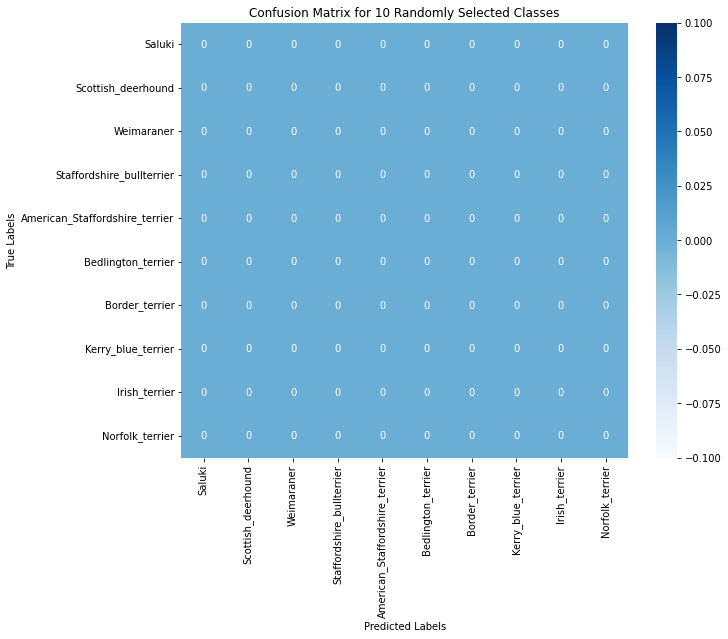

In [36]:
import seaborn as sns
y_pred = model.predict(x_test1)

# convert one-hot encoded labels to integer labels
y_true = le.classes_[np.argmax(y_test,axis=1)]

# select 10 breeds to show in confusion matrix
selected_breeds = ['Saluki', 'Scottish_deerhound', 'Weimaraner', 'Staffordshire_bullterrier', 'American_Staffordshire_terrier', 'Bedlington_terrier', 'Border_terrier', 'Kerry_blue_terrier', 'Irish_terrier', 'Norfolk_terrier']

# filter actual and predicted labels for selected breeds
# filter actual and predicted labels for selected breeds
selected_indices = np.isin(y_true, np.arange(len(selected_breeds)))
y_true_selected = y_true[selected_indices]
y_pred_selected = le.classes_[np.argmax(y_pred[selected_indices], axis=1)]

# create confusion matrix for selected breeds only
conf_matrix = confusion_matrix(y_true_selected, y_pred_selected, labels=np.arange(len(selected_breeds)))

# create dataframe for confusion matrix
conf_df = pd.DataFrame(conf_matrix, index=selected_breeds, columns=selected_breeds)

# plot confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(conf_df, annot=True, cmap='Blues')
plt.title('Confusion Matrix for 10 Randomly Selected Classes')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [21]:
import pickle

# Assuming le is the LabelEncoder object
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)

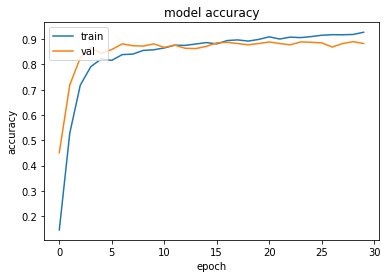

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

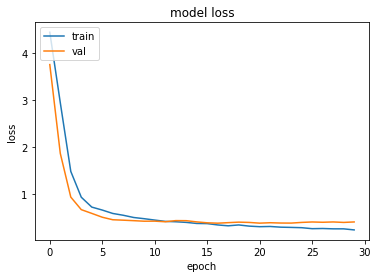

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [24]:
model.save('Dog_model.h5')

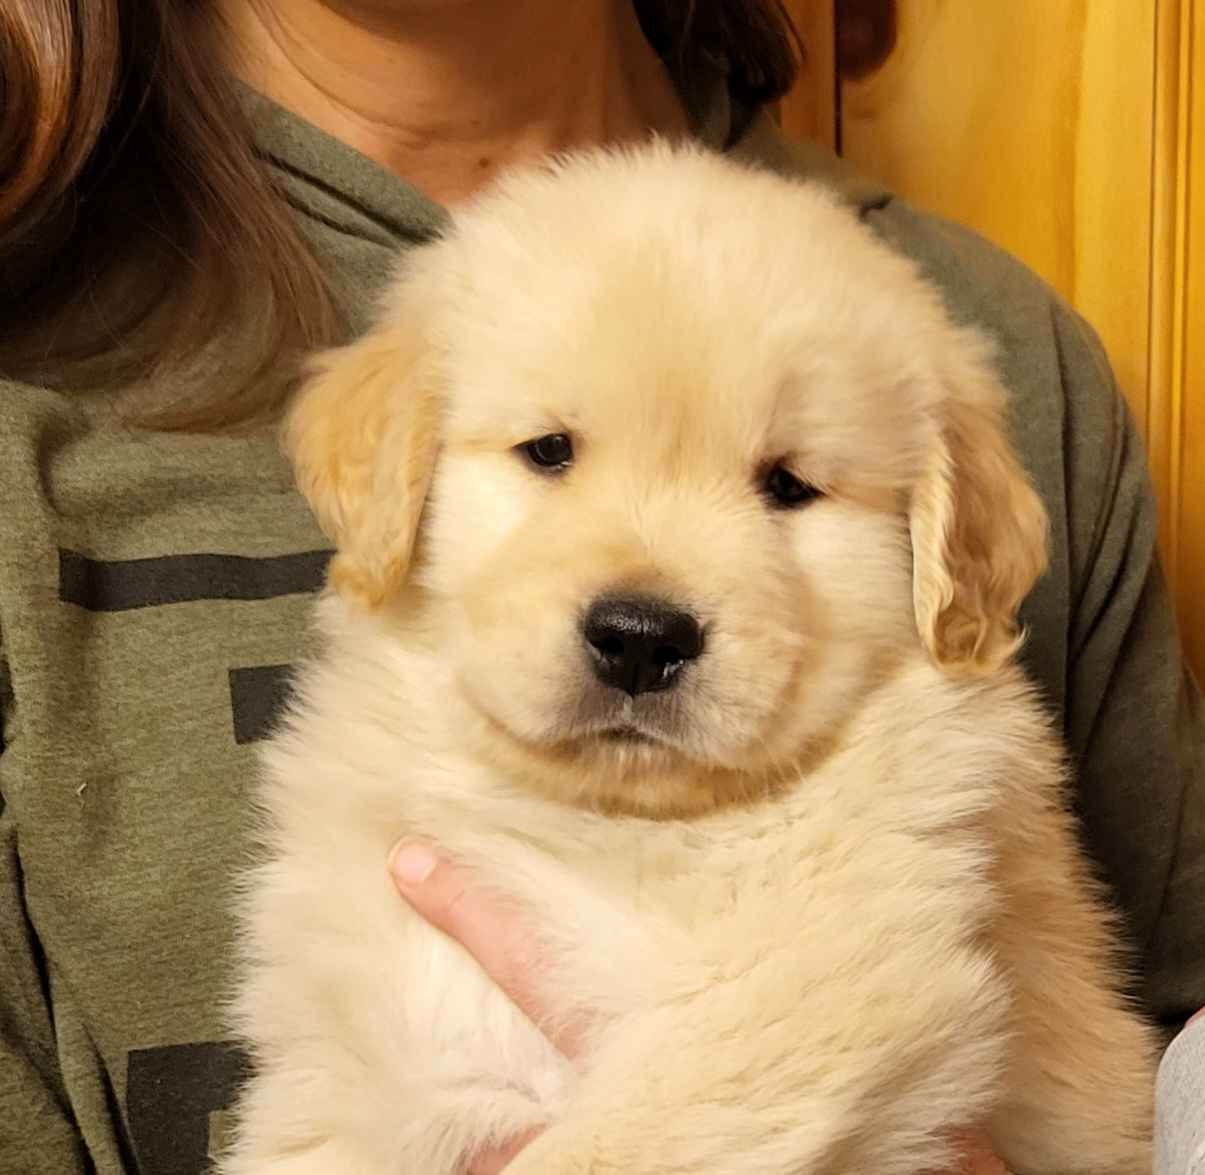

In [25]:
from IPython.display import display
from PIL import Image
immg='C:/Users/paude/OneDrive/Desktop/Doggies/1674523956_1906_1457.jpg'
img=Image.open(immg)
display(img)

In [26]:
img_data = np.array([img_to_array(load_img(immg, target_size = (299,299)))])

In [27]:
x_test2 = img_data / 255.

In [28]:
test_predictions = model.predict(x_test2)
predictions = le.classes_[np.argmax(test_predictions,axis=1)]

1/1 [==============================] - 0s 113ms/step


In [29]:
print(predictions)

['golden_retriever']
